In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[15,10]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import shapiro
import statsmodels.stats.api as ssa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sma
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [2]:
df = pd.read_excel("kanish.xlsx")
df.head()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,2,193,3,15,1.949
1,2,193,3,15,1.777
2,2,193,3,15,1.583
3,2,213,4,25,1.692
4,2,213,4,25,1.528


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vol %                   27 non-null     int64  
 1   water pressure (Mpa)    27 non-null     int64  
 2   SOD(mm)                 27 non-null     int64  
 3   Traverse rate (mm/min)  27 non-null     int64  
 4   Ra(output)              27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [4]:
df.corr()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
Vol %,1.000000e+00,-1.944653e-15,7.768335e-16,-2.960595e-17,-0.125076
water pressure (Mpa),-1.944653e-15,1.000000e+00,3.430376e-16,3.619750e-16,0.169651
SOD(mm),7.768335e-16,3.430376e-16,1.000000e+00,-5.518852e-17,0.071034
Traverse rate (mm/min),-2.960595e-17,3.619750e-16,-5.518852e-17,1.000000e+00,-0.044014
Ra(output),-1.250764e-01,1.696506e-01,7.103445e-02,-4.401351e-02,1.000000


In [5]:
df.describe()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.000000,27.00000,27.000000,27.000000
mean,4.000000,213.333333,4.00000,25.000000,1.643444
std,1.664101,17.058722,0.83205,8.320503,0.165939
min,2.000000,193.000000,3.00000,15.000000,1.468000
25%,2.000000,193.000000,3.00000,15.000000,1.525000
50%,4.000000,213.000000,4.00000,25.000000,1.583000
75%,6.000000,234.000000,5.00000,35.000000,1.734500
max,6.000000,234.000000,5.00000,35.000000,2.035000


In [6]:
cols = ['water pressure (Mpa)', 'Vol %', 'SOD(mm)', 'Traverse rate (mm/min)']

In [7]:
for i in cols:
    print(df[i].value_counts())

193    9
213    9
234    9
Name: water pressure (Mpa), dtype: int64
2    9
4    9
6    9
Name: Vol %, dtype: int64
3    9
4    9
5    9
Name: SOD(mm), dtype: int64
15    9
25    9
35    9
Name: Traverse rate (mm/min), dtype: int64


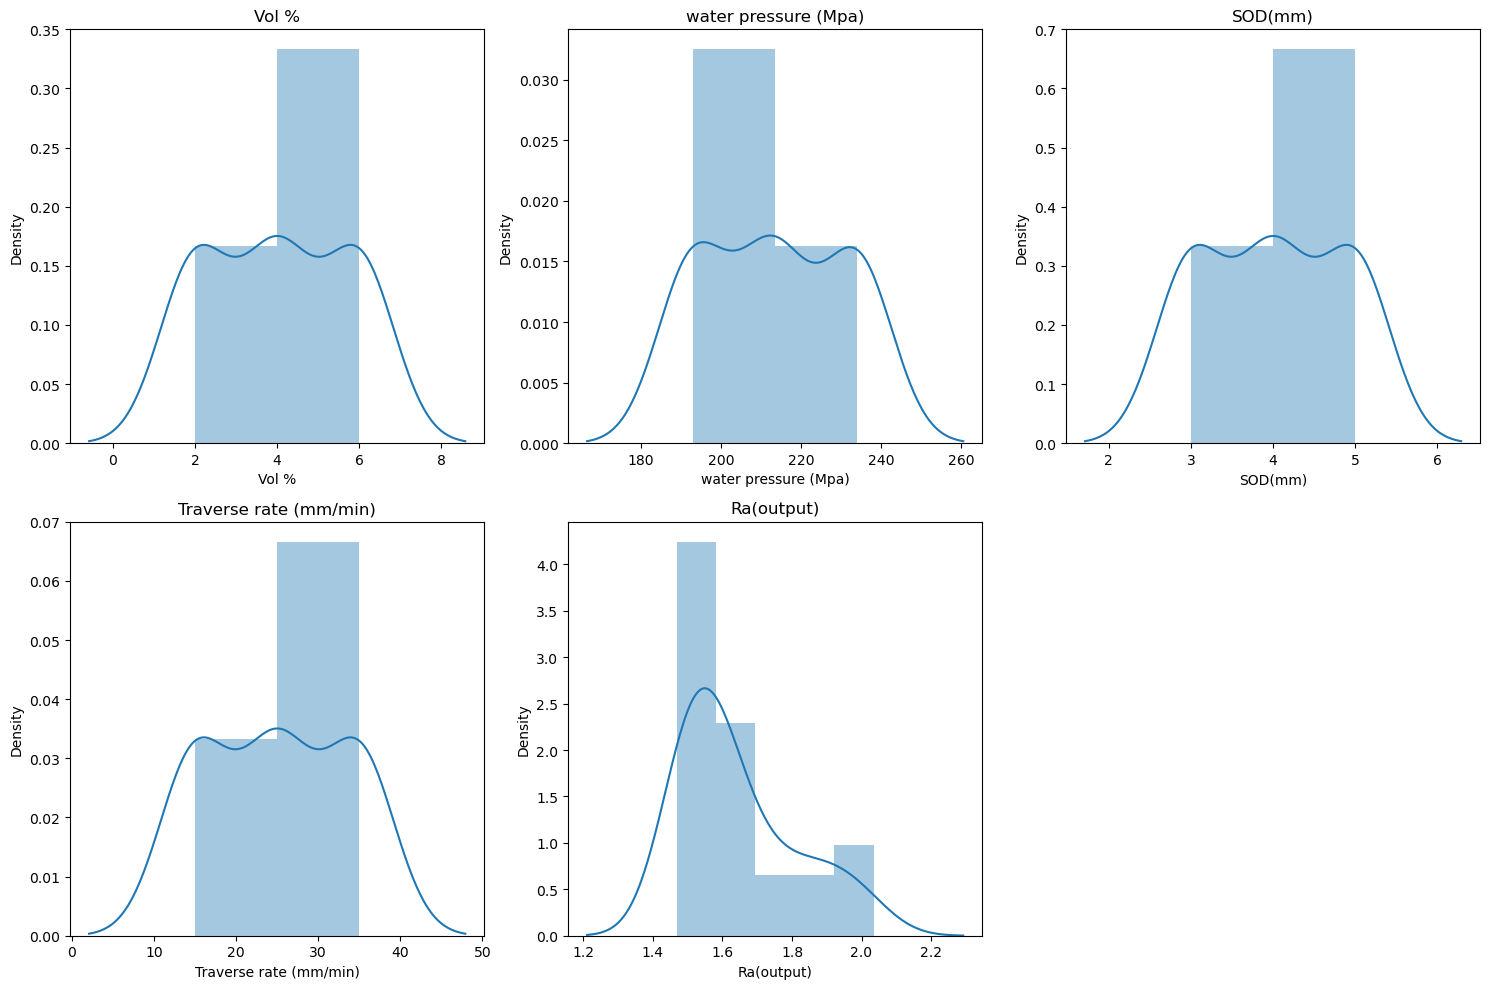

In [8]:
num_cols = df.select_dtypes(exclude='object')
num = num_cols.columns

nrows= 2
ncol = 3
iterator = 1
for i in num:
    plt.subplot(nrows,ncol,iterator)
    sns.distplot(df.loc[:,i],kde=True)
    iterator +=1
    plt.title(i)
plt.tight_layout()
plt.show()

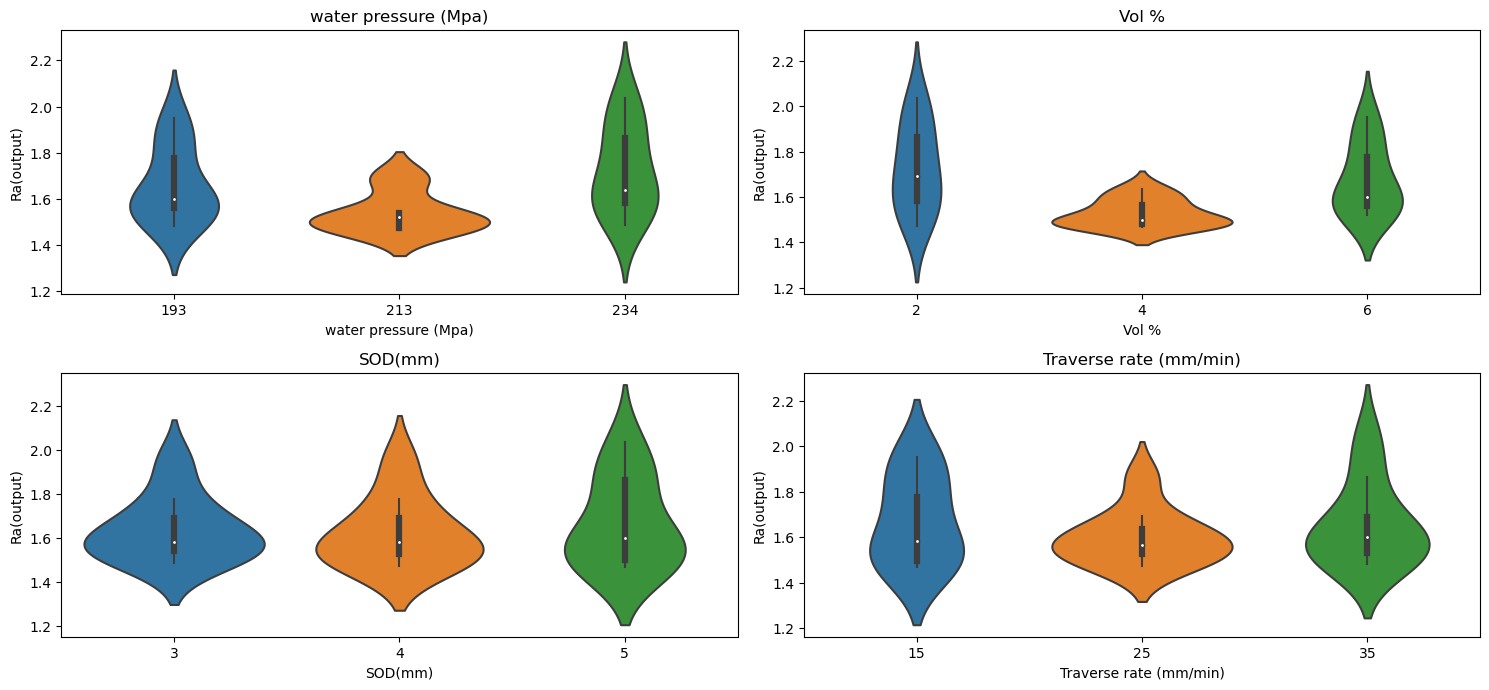

In [9]:
plt.rcParams["figure.figsize"]=[15,10]
cols = ["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']
nrows= 3
ncol = 2
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df[i],y=df['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

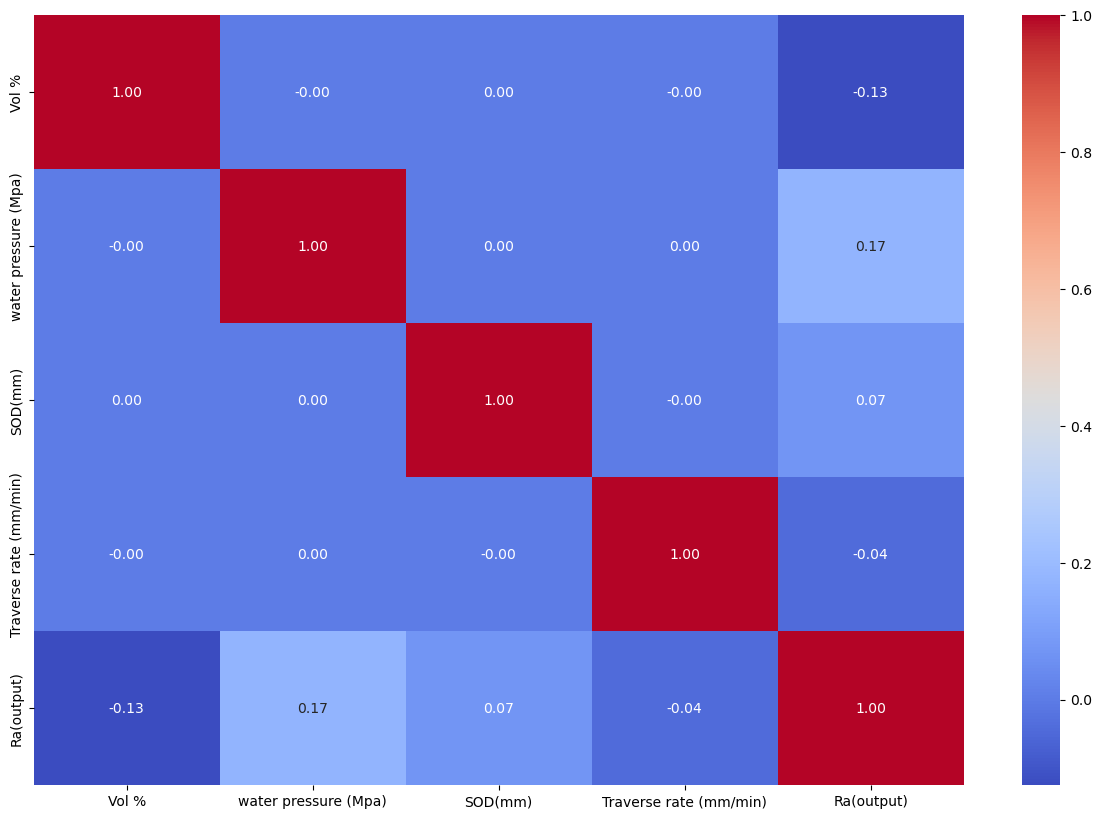

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

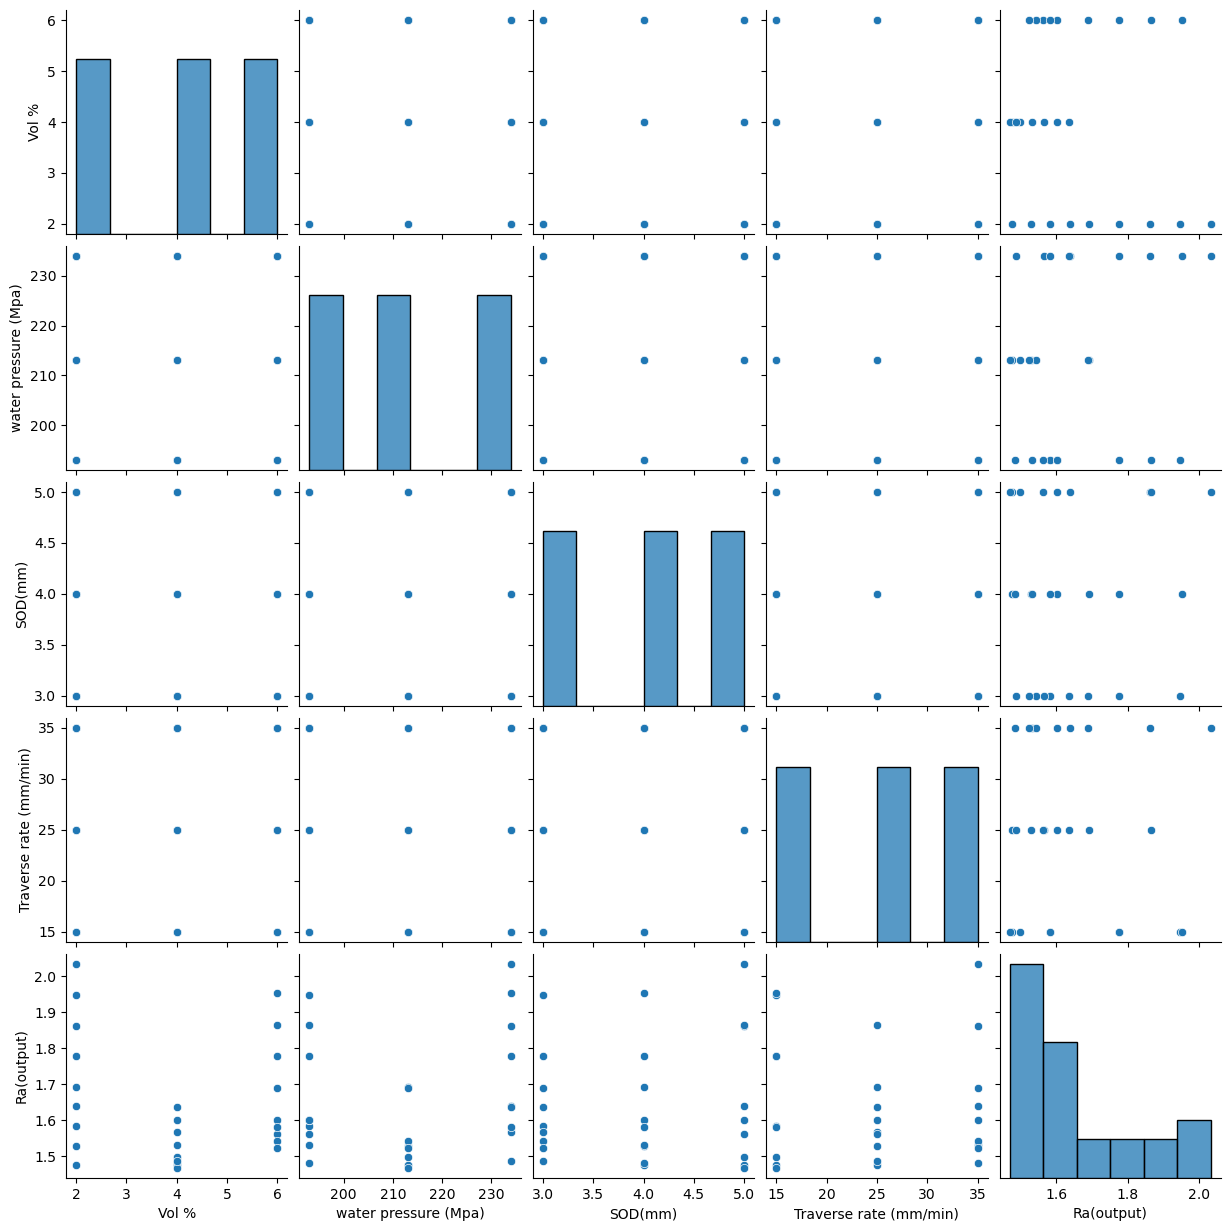

In [11]:
sns.pairplot(df,palette="bright")
plt.show()

In [12]:
df1 = df.copy(deep=True)

#### Feature engineering

In [13]:
# because the water pressure has the highest coorelation with the target

In [14]:
df1['Mean_Targ_Vol%'] = df1.groupby('Vol %')['Ra(output)'].transform('mean')

#### Scaling the data
* using the standard scaler transformation

In [15]:
ss = StandardScaler()

In [16]:
df1[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']] = ss.fit_transform(df1[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']])

**Statistical test** 

* Ho: that the predictor is independent of target ( the predictor and target are not related)
* H1: that the predictor dependent of target

In [17]:
cols

['water pressure (Mpa)', 'Vol %', 'SOD(mm)', 'Traverse rate (mm/min)']

In [18]:
for i in cols:    
    teststats,pvalue = stats.ttest_ind(df1[i], df1['Ra(output)'])
    print(i,'=',pvalue,'/',(pvalue<0.05))

water pressure (Mpa) = 4.759823274056221e-11 / True
Vol % = 4.759823274056221e-11 / True
SOD(mm) = 4.759823274056221e-11 / True
Traverse rate (mm/min) = 4.759823274056221e-11 / True


p value is < 0.05 for all the independent varialbles, 
hence we conclude that the target variable is dependent on all the features

In [19]:
df1.skew()

Vol %                     0.000000
water pressure (Mpa)      0.031647
SOD(mm)                   0.000000
Traverse rate (mm/min)    0.000000
Ra(output)                1.010708
Mean_Targ_Vol%           -0.560029
dtype: float64

In [20]:
# there is no skewness in the data

In [21]:
# model builiding

In [22]:
x = df1.drop(columns=['Ra(output)'],axis=1)
y = df1['Ra(output)']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(21, 5)
(6, 5)
(21,)
(6,)


In [24]:
temp_train = sma.add_constant(xtrain)
temp_test = sma.add_constant(xtest)

In [25]:
model = sma.OLS(ytrain,temp_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ra(output)   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.560
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.231
Time:                        19:56:19   Log-Likelihood:                 13.037
No. Observations:                  21   AIC:                            -14.07
Df Residuals:                      15   BIC:                            -7.807
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0948      0.649      0.146      0.886      -1.289       1.478
Vol %                     -0.0212      0.036     -0.595      0.561      -0.097       0.055
water pressure (Mpa)       0.0400      0.034      1.177      0.258      -0.032       0.113
SOD(mm)                    0.0017      0.034      0.050      0.961      -0.070       0.074
Traverse rate (mm/min)    -0.0117      0.034     -0.344      0.736      -0.084       0.061
Mean_Targ_Vol%             0.9364      0.396      2.363      0.032       0.092       1.781
==============================================================================
Omnibus:                        2.603   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.059
Skew:                           0.742   Prob(JB):                        0.357
Kurtosis:                       2.610   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assumptions**
* **Linearity** : That there should be a linear pattern between the predictors and target ** Statistical test : rainbow Test**
* **Normality** : That the model residuals should be normal ** Statisticak Test : Jarque bera test**
* **Multicollinearity** : All the predictors should not be highly correlated, ** Statistical test : Correlation,condition NO & VIF**
* **Autocorrelation of Errors**: the error should not be correlated ** Statistical Test: Durbin Watson Test the Range of DW test is between 0-4 where is the ideal value is 2 and tolerance range 1.5-2.5
* **Heteroscedasticity** : That the data has unequal variance , Statistical Test : Breusch Pagan Test

In [26]:
# Linearity : That there should be a linear pattern between the predictors and target --> Statistical test : rainbow Test
ssa.linear_rainbow(model)[1]

0.5849063815459101

In [27]:
# pvalue > 0.05 --> Linearity is passed

In [28]:
ssa.jarque_bera(model.resid)[1] #  pvalue > 0.05 --> Linearity is passed

0.357175221668916

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Multicollinearity  - condition no is below 100 then its ok
vif_list=[]
for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values,i))

pd.DataFrame({'features':xtrain.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,features,VIF
1,water pressure (Mpa),1.027302
3,Traverse rate (mm/min),1.027002
4,Mean_Targ_Vol%,1.026251
0,Vol %,1.011732
2,SOD(mm),1.011365


In [31]:
# Autocorrelation of Errors

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)
# 1.5-2.5 ( no auto correlation ) 

2.067342515274128

In [32]:
# Heteroscedasticity
ssa.het_breuschpagan(model.resid,model.model.exog)[3] 
# That the data has unequal variance

0.25840741498471104

In [33]:
# all the model assumptions  are passed 

In [34]:
# Creating a linier model for data size increase

In [35]:
df.head()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,2,193,3,15,1.949
1,2,193,3,15,1.777
2,2,193,3,15,1.583
3,2,213,4,25,1.692
4,2,213,4,25,1.528


In [36]:
x_up = df.drop(columns=['Ra(output)'],axis=1)
y_up = df['Ra(output)']

In [37]:
lr = LinearRegression() 

lr.fit(x_up,y_up)

LinearRegression()

In [38]:
lr.coef_

array([-0.01247222,  0.00165028,  0.01416667, -0.00087778])

In [39]:
lr.intercept_

1.3065518988457132

In [40]:
df.describe()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,27.000000,27.000000,27.00000,27.000000,27.000000
mean,4.000000,213.333333,4.00000,25.000000,1.643444
std,1.664101,17.058722,0.83205,8.320503,0.165939
min,2.000000,193.000000,3.00000,15.000000,1.468000
25%,2.000000,193.000000,3.00000,15.000000,1.525000
50%,4.000000,213.000000,4.00000,25.000000,1.583000
75%,6.000000,234.000000,5.00000,35.000000,1.734500
max,6.000000,234.000000,5.00000,35.000000,2.035000


### Increasing sample size

In [42]:
def create_dataset():
    names = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)','Ra(output)']
    df = pd.DataFrame([], columns=names)
    total = 0
    while total < 300:
        total += 1 
        
        import random
        num1 = 0
        num1 = random.randint(2,8)      
        num2 = random.randint(193,234)
        num3 = random.randint(3,7)    
        num4 = random.randint(15,35)
        
        Ra1 = -0.01247222
        Ra2 = 0.00165028
        Ra3 = 0.01416667
        Ra4 = -0.00087778
        Ra_in = 1.3065518988457132

        CIR = 0
        CIR = num1*Ra1
        CIR = CIR + num2*Ra2
        CIR = CIR + num3*Ra3
        CIR = CIR + num4*Ra4
        CIR = CIR + Ra_in
        CIR = round(CIR, 6)

        I1 = num1
        I2 = num2
        I3 = num3
        I4 = num4
        
        Target1 = CIR
                       
        vector = [I1,I2,I3,I4,Target1]
        
        df_temp = pd.DataFrame([vector],columns=names)
        df = df.append(df_temp)
        
    return df

In [43]:
df2 = create_dataset()

In [44]:
df2.shape  # sample 

(300, 5)

In [45]:
df2.reset_index(inplace=True)

In [46]:
df2.drop(columns='index',axis=1,inplace=True)

In [47]:
df2.head()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
0,6,212,7,29,1.655289
1,8,216,6,26,1.625412
2,2,222,7,20,1.729581
3,4,211,4,22,1.642228
4,6,199,6,28,1.620546


In [48]:
df2['Vol %'] = df2['Vol %'].astype('int')
df2['water pressure (Mpa)'] = df2['water pressure (Mpa)'].astype('int')
df2['SOD(mm)'] = df2['SOD(mm)'].astype('int')
df2['Traverse rate (mm/min)'] = df2['Traverse rate (mm/min)'].astype('int')

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vol %                   300 non-null    int32  
 1   water pressure (Mpa)    300 non-null    int32  
 2   SOD(mm)                 300 non-null    int32  
 3   Traverse rate (mm/min)  300 non-null    int32  
 4   Ra(output)              300 non-null    float64
dtypes: float64(1), int32(4)
memory usage: 7.2 KB


In [50]:
df2.corr()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
Vol %,1.000000,0.049909,0.013304,-0.023629,-0.644945
water pressure (Mpa),0.049909,1.000000,-0.034596,-0.019817,0.501193
SOD(mm),0.013304,-0.034596,1.000000,0.001861,0.501608
Traverse rate (mm/min),-0.023629,-0.019817,0.001861,1.000000,-0.130079
Ra(output),-0.644945,0.501193,0.501608,-0.130079,1.000000


In [51]:
df2.describe()

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5.073333,213.430000,4.870000,24.956667,1.642581
std,1.998651,12.188806,1.366011,5.668795,0.036513
min,2.000000,193.000000,3.000000,15.000000,1.556508
25%,3.000000,203.000000,4.000000,20.000000,1.618139
50%,5.000000,214.000000,5.000000,25.000000,1.642614
75%,7.000000,224.000000,6.000000,29.000000,1.667567
max,8.000000,234.000000,7.000000,35.000000,1.731355


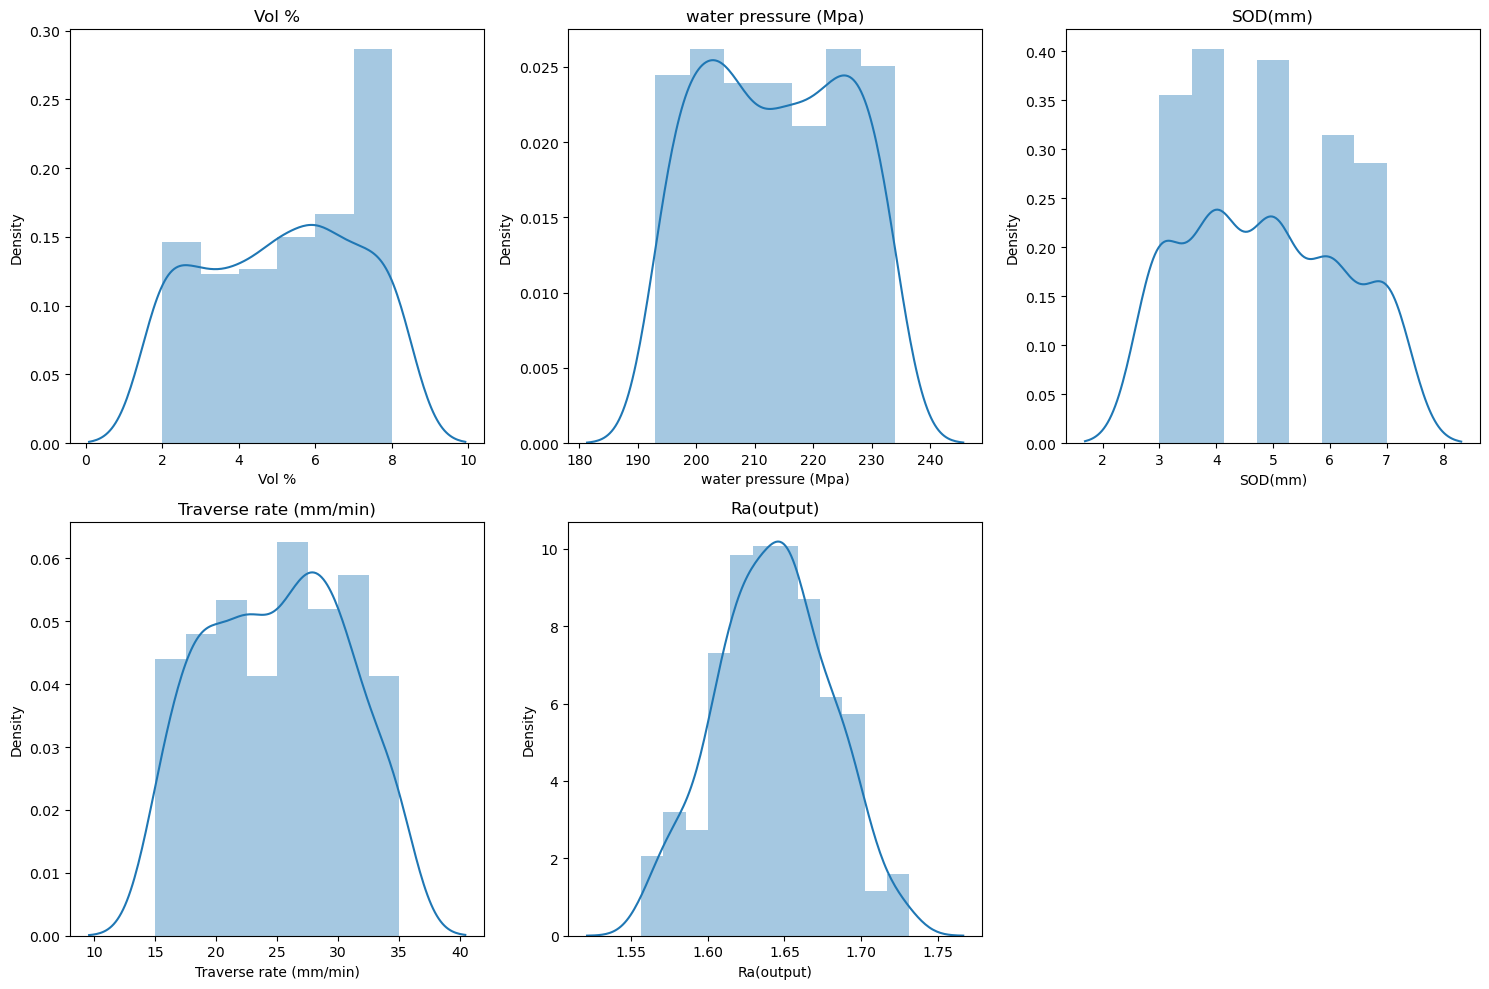

In [52]:
num_cols = df2.select_dtypes(exclude='object')
num = num_cols.columns

nrows= 2
ncol = 3
iterator = 1
for i in num:
    plt.subplot(nrows,ncol,iterator)
    sns.distplot(df2.loc[:,i],kde=True)
    iterator +=1
    plt.title(i)
plt.tight_layout()
plt.show()

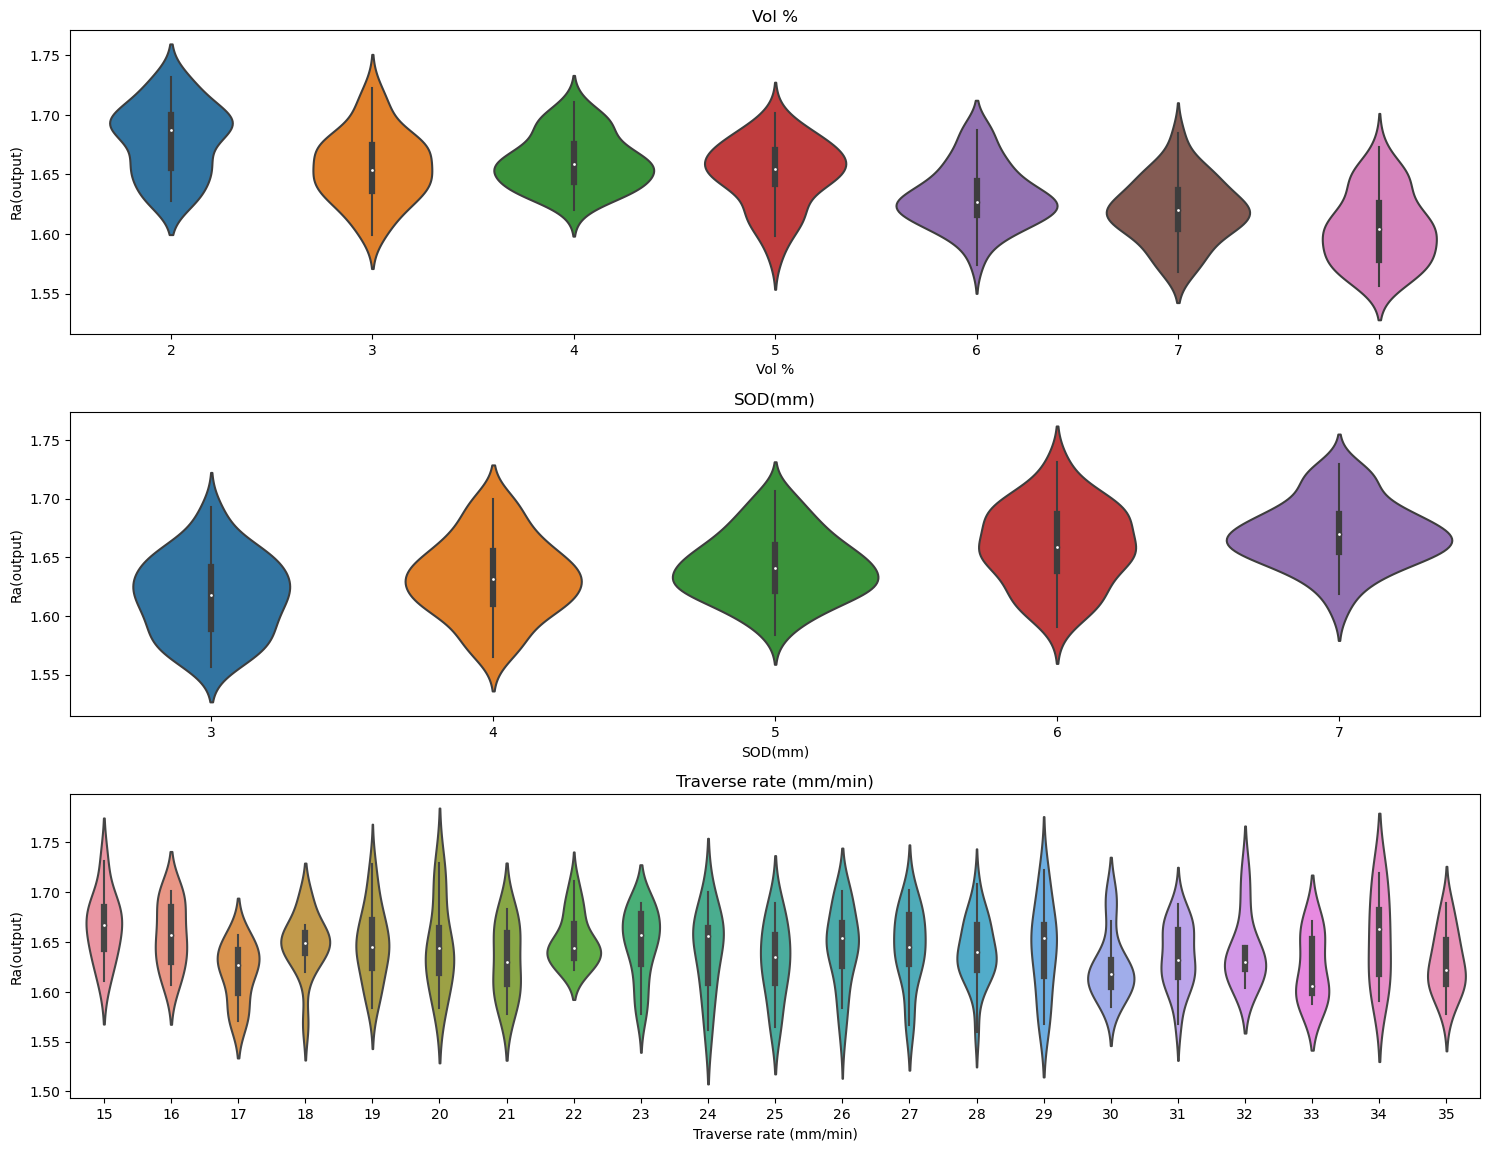

In [53]:
plt.rcParams["figure.figsize"]=[15,15]
cols = ['Vol %','SOD(mm)', 'Traverse rate (mm/min)']
nrows= 4
ncol = 1
iterator = 1
for i in cols:
    plt.subplot(nrows,ncol,iterator)
    sns.violinplot(x=df2[i],y=df2['Ra(output)'])
    iterator+=1
    plt.title(i)
plt.tight_layout()
plt.show()

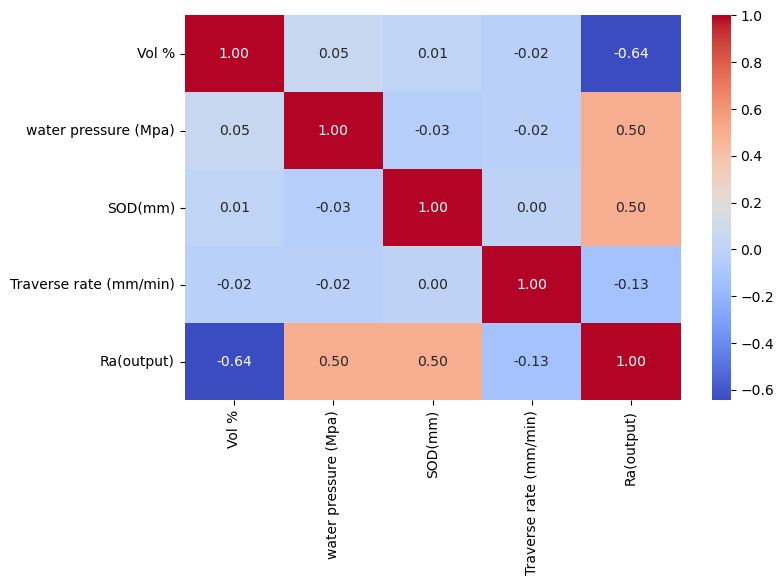

In [54]:
plt.rcParams["figure.figsize"]=[8,5]
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

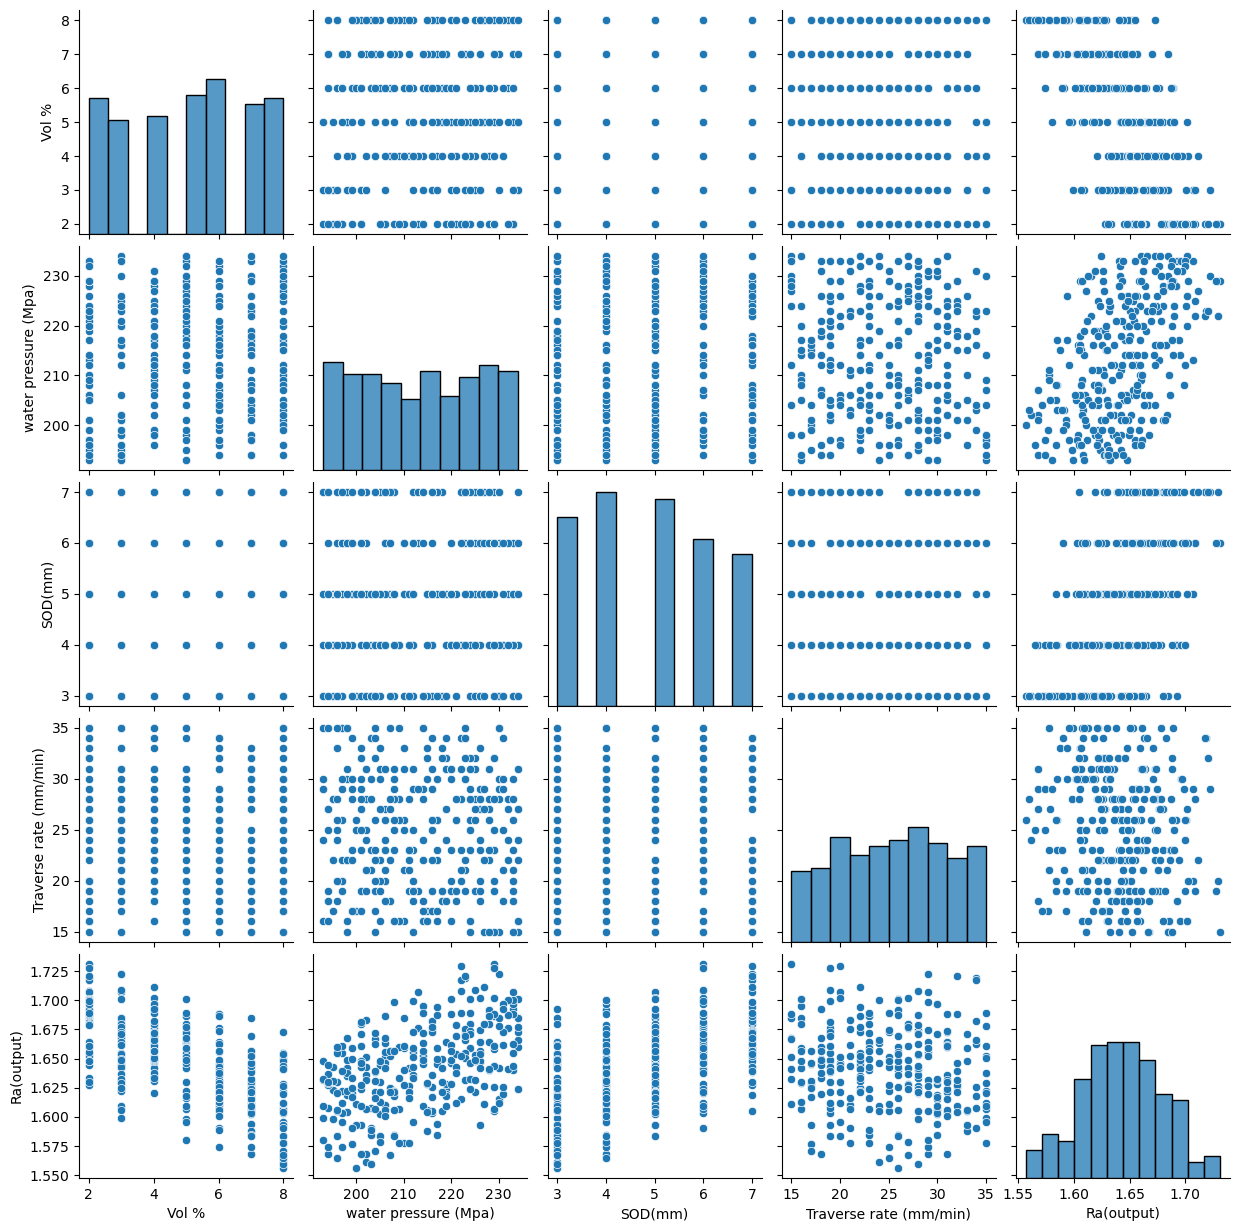

In [55]:
sns.pairplot(df2,palette="bright")
plt.show()

In [56]:
df3 = df2.copy(deep=True)

In [57]:
df3['Mean_Targ_Vol%'] = df3.groupby('Vol %')['Ra(output)'].transform('mean')  # feature engineering
df3['Mean_Targ_SOD(mm)'] = df3.groupby('SOD(mm)')['Ra(output)'].transform('mean')

In [58]:
df3.skew()

Vol %                    -0.088934
water pressure (Mpa)      0.021730
SOD(mm)                   0.141669
Traverse rate (mm/min)    0.005769
Ra(output)               -0.012929
Mean_Targ_Vol%           -0.105108
Mean_Targ_SOD(mm)         0.124112
dtype: float64

In [59]:
# from sklearn.preprocessing import PowerTransformer

In [60]:
# a1 = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)', 'Mean_Targ_Vol%','Mean_Targ_SOD(mm)']

In [61]:
# b=PowerTransformer(method='yeo-johnson')

# df3[a1] = b.fit_transform(df3[a1])

In [62]:
df3.skew()

Vol %                    -0.088934
water pressure (Mpa)      0.021730
SOD(mm)                   0.141669
Traverse rate (mm/min)    0.005769
Ra(output)               -0.012929
Mean_Targ_Vol%           -0.105108
Mean_Targ_SOD(mm)         0.124112
dtype: float64

In [63]:
df3.columns

Index(['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)',
       'Ra(output)', 'Mean_Targ_Vol%', 'Mean_Targ_SOD(mm)'],
      dtype='object')

In [64]:
cols_1=['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)', 'Mean_Targ_Vol%']

In [65]:
df3[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)','Mean_Targ_Vol%']] = ss.fit_transform(df3[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)','Mean_Targ_Vol%']])

In [66]:
x = df3.drop(columns=['Ra(output)'],axis=1)
y = df3['Ra(output)']

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 6)
(60, 6)
(240,)
(60,)


In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.feature_selection import RFE

In [69]:
# not using linear regression as data is created using linear regression
# the assumptions alos fails

In [70]:
temp_train = sma.add_constant(xtrain)
temp_test = sma.add_constant(xtest)

In [71]:
model1 = sma.OLS(ytrain,temp_train).fit()

In [72]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ra(output)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.502e+11
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:56:38   Log-Likelihood:                 3296.3
No. Observations:                 240   AIC:                            -6579.
Df Residuals:                     233   BIC:                            -6554.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.6426   1.94e-05   8.46e+04      0.000       1.643       1.643
Vol %                     -0.0249   8.34e-08  -2.99e+05      0.000      -0.025      -0.025
water pressure (Mpa)       0.0201   1.75e-08   1.15e+06      0.000       0.020       0.020
SOD(mm)                    0.0193   2.16e-07   8.94e+04      0.000       0.019       0.019
Traverse rate (mm/min)    -0.0050   1.75e-08  -2.85e+05      0.000      -0.005      -0.005
Mean_Targ_Vol%         -1.121e-07   8.33e-08     -1.345      0.180   -2.76e-07    5.21e-08
Mean_Targ_SOD(mm)      -8.987e-06   1.18e-05     -0.761      0.448   -3.23e-05    1.43e-05
==============================================================================
Omnibus:                       93.144   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.391
Skew:                           0.016   Prob(JB):                      0.00124
Kurtosis:                       1.843   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# Linearity : That there should be a linear pattern between the predictors and target --> Statistical test : rainbow Test
ssa.linear_rainbow(model1)[1]

0.7546563629951816

In [74]:
ssa.jarque_bera(model1.resid)[3]

1.8432779444674259

In [75]:
durbin_watson(model1.resid)

1.9317344166836015

In [76]:
ssa.het_breuschpagan(model1.resid,model1.model.exog)[3]   # 

0.7031021762556091

In [77]:
 # and condtion no test fails its greater than 100
# so we reject all the parametric models for model bilding 

In [78]:
df5 = df2.copy(deep=True)

In [79]:
df5[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']] = ss.fit_transform(df5[["water pressure (Mpa)",'Vol %','SOD(mm)', 'Traverse rate (mm/min)']])
x = df5.drop(columns=['Ra(output)'],axis=1)
y = df5['Ra(output)']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(240, 4)
(60, 4)
(240,)
(60,)


In [80]:
dt   = DecisionTreeRegressor(random_state=10)
rf   = RandomForestRegressor(random_state=10)
knn  = KNeighborsRegressor()
Ada  = AdaBoostRegressor(random_state=10)
xgb  = XGBRegressor(random_state=10)

In [81]:
l1 = [dt,rf,knn,Ada,xgb]

In [82]:
def models(mod, xtrain, ytrain, xtest, ytest):
    l = [str(mod).split('(')[0]]
    model1 = mod.fit(xtrain, ytrain)
    ypred_train = model1.predict(xtrain)
    ypred = model1.predict(xtest)
    
    l.append(model1.score(xtrain, ytrain))  # Training accuracy
    l.append(model1.score(xtest, ytest))    # Testing accuracy
    
    l.append(round(r2_score(ytest, ypred),3))
    l.append(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
    l.append(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test
    
    return l

In [83]:
best = pd.DataFrame(columns = ['Model','Train_ACC','Test_ACC','r2_score','RMSE_train','RMSE_test'])

In [84]:
perf1 = models(dt,xtrain,ytrain,xtest,ytest)
perf2 = models(rf,xtrain,ytrain,xtest,ytest)
perf3 = models(knn,xtrain,ytrain,xtest,ytest)
perf4 = models(Ada,xtrain,ytrain,xtest,ytest)
perf5 = models(xgb,xtrain,ytrain,xtest,ytest)

In [85]:
best.loc[len(best)] = perf1
best.loc[len(best)] = perf2
best.loc[len(best)] = perf3
best.loc[len(best)] = perf4
best.loc[len(best)] = perf5

In [86]:
best

,Model,Train_ACC,Test_ACC,r2_score,RMSE_train,RMSE_test
0,DecisionTreeRegressor,1.000000,0.856720,0.857,0.00000,0.01356
1,RandomForestRegressor,0.992868,0.928472,0.928,0.00308,0.00958
2,KNeighborsRegressor,0.960751,0.925120,0.925,0.00723,0.00980
3,AdaBoostRegressor,0.933081,0.890145,0.890,0.00944,0.01187
4,XGBRegressor,0.999349,0.974971,0.975,0.00093,0.00567


In [87]:
# random forest is best model 
# doing hyper parameter tuning 

In [88]:
RandomForestRegressor()

RandomForestRegressor()

In [89]:
params = {'n_estimators':[100,150,200],
            'min_samples_split':range(2,5),
          'min_samples_leaf':range(1,5),
           'max_depth':[3,4,5,6,7]}

Grid  = GridSearchCV(estimator=rf,cv=5,param_grid=params,n_jobs=-1)

Grid.fit(xtrain,ytrain)

Grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [90]:
rf   = RandomForestRegressor(n_estimators=200,random_state=10,max_depth=7,min_samples_leaf=1,min_samples_split=2)
m1 = rf.fit(xtrain, ytrain)
ypred_train = m1.predict(xtrain)
ypred = m1.predict(xtest)

print(m1.score(xtrain, ytrain))  # Training accuracy
print(m1.score(xtest, ytest))    # Testing aprint
print(round(r2_score(ytest, ypred),3))
print(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
print(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test

0.9897547102060826
0.9250694838127526
0.925
0.00369
0.00981


In [91]:
min(ypred)

1.580930318003288

In [92]:
feature_importances = m1.feature_importances_

In [93]:
feature_importances

array([0.43965181, 0.29884992, 0.22885493, 0.03264333])

In [94]:
feature_importances = [0.43205425, 0.33158923, 0.20935913, 0.0269974]
column_names = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

importance_df.sort_values(by='Importance', ascending=False, inplace=True)


importance_df


,Feature,Importance
0,Vol %,0.432054
1,water pressure (Mpa),0.331589
2,SOD(mm),0.209359
3,Traverse rate (mm/min),0.026997


In [95]:
import pandas as pd

# Assuming you have the feature importances and the original DataFrame
feature_importances = [0.43205425, 0.33158923, 0.20935913, 0.0269974]
column_names = ['Vol %', 'water pressure (Mpa)', 'SOD(mm)', 'Traverse rate (mm/min)']

# Create a DataFrame to store the feature importances along with their corresponding column names
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Get the best value for each feature
best_values = {}

for feature_name in importance_df['Feature']:
    best_values[feature_name] = df5[feature_name].max()

print("Best values for each feature:")
for feature, value in best_values.items():
    print(f"{feature}: {value}")


Best values for each feature:
Vol %: 1.466767961937645
water pressure (Mpa): 1.6904337800631286
SOD(mm): 1.5618897460449015
Traverse rate (mm/min): 1.7746476502482307


In [96]:
df5[(df5['Vol %']==1.4812863378733994)&(df5['water pressure (Mpa)']==1.5061702516366655)|(df5['water pressure (Mpa)']==1.3432313511206668)&(df5['Traverse rate (mm/min)']==1.646447003453689) ]

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)


In [97]:
df2.iloc[[86,103]]

,Vol %,water pressure (Mpa),SOD(mm),Traverse rate (mm/min),Ra(output)
86,6,203,3,21,1.590792
103,7,201,3,29,1.567997


In [98]:
def preprocess(df2):
    X=df2.drop('Ra(output)',1)
    y=df2['Ra(output)']
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=42)
    return xtrain,xtest,ytrain,ytest

In [99]:
# Creatig a pipline object for deployment
from sklearn.pipeline import Pipeline

steps = [('scaler',ss),('RFC tuned',rf)]
pipeline = Pipeline(steps)
xtrain,xtest,ytrain,ytest = preprocess(df2)
pipeline.fit(xtrain,ytrain)
ypred = pipeline.predict(xtest)

print(pipeline.score(xtrain, ytrain))  # Training accuracy
print(pipeline.score(xtest, ytest))    # Testing aprint
print(round(r2_score(ytest, ypred),3))
#print(round(np.sqrt(mean_squared_error(ytrain, ypred_train)), 5))
print(round(np.sqrt(mean_squared_error(ytest, ypred)), 5))  # rmse test

0.9890678069589135
0.9597117484462228
0.96
0.00825


In [100]:
import pickle
model=open('rf.pickle','wb')
pickle.dump(pipeline,model)
model.close()

In [101]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.title('water_jet')

# Step 1: Load the Model
model = open('rf.pickle', 'rb')
pipeline = pickle.load(model)
model.close()

# Step 2: Create a UI for the front-end user
VOL = st.number_input('Vol %', min_value=2, max_value=8)
water_pressure = st.number_input('water pressure (Mpa)', min_value=193, max_value=234)
SOD = st.number_input('SOD(mm)', min_value=3, max_value=7)
Traverse_rate = st.number_input('Traverse rate (mm/min)', min_value=15, max_value=35)

# Step 3: Change User Input to Model Input data
data = {'VOL': [VOL], 'water_pressure': [water_pressure], 'SOD': [SOD], 'Traverse_rate': [Traverse_rate]}
input_data = pd.DataFrame(data)

# Step 4: Get Predictions and Print the result
if st.button('Predict'):
    result = pipeline.predict(input_data)
    st.table(input_data)
    st.success(str(result[0]))

Overwriting app.py
